## WeatherPy Main Workfile

### Initial identification

In [1]:
#!pip install arrow # this module is to get now() date

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import arrow
from scipy.stats import linregress
import scipy.stats as sts
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count

api_key = weather_api_key
#print(api_key)
len(cities)

632

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [3]:
# parameters

url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={api_key}&units={units}&q='


In [4]:
# list names for dataframe
city_name = []
cloudiness = []
dates = []
humidity = []
lat = []
lon = []
max_temp = []
wind_speed = []

In [5]:
# counters to store record counts and sets of 50 counts
record_count = 0
set_count = 1

In [6]:
# loop through list of random cities

print(f'Beginning Data Retrieval')
print('-------------------------------')

for index, city in enumerate(cities):

    try:
        response = requests.get(query_url + city).json()
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        dates.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        
        if record_count > 49:
            record_count = 0
            set_count += 1
        else:
            record_count += 1

        print(f"Processing Record {record_count} of Set {set_count} | {city}")
  
    except(KeyError, IndexError):
        
        print("City not found. Skipping...")
        
print('-------------------------------')
print('Data Retrieval Complete ')
print('-------------------------------')

Beginning Data Retrieval
-------------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | nikolskoye
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | atuona
Processing Record 5 of Set 1 | beringovskiy
Processing Record 6 of Set 1 | sao joao da ponte
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | victoria
Processing Record 9 of Set 1 | yellowknife
Processing Record 10 of Set 1 | cape town
Processing Record 11 of Set 1 | walvis bay
Processing Record 12 of Set 1 | tilichiki
Processing Record 13 of Set 1 | campbell river
City not found. Skipping...
Processing Record 14 of Set 1 | kashi
Processing Record 15 of Set 1 | lingyuan
Processing Record 16 of Set 1 | umm lajj
Processing Record 17 of Set 1 | fortuna
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | laredo
Processing Record 21 of Set 1 | perth
Processing Record 22 of Set 1 | krasnoselk

Processing Record 36 of Set 4 | castro
Processing Record 37 of Set 4 | socorro
Processing Record 38 of Set 4 | maymyo
City not found. Skipping...
Processing Record 39 of Set 4 | sabla
Processing Record 40 of Set 4 | tarare
City not found. Skipping...
Processing Record 41 of Set 4 | hokitika
City not found. Skipping...
Processing Record 42 of Set 4 | benghazi
Processing Record 43 of Set 4 | bonaventure
Processing Record 44 of Set 4 | debre sina
Processing Record 45 of Set 4 | nsanje
Processing Record 46 of Set 4 | vestmannaeyjar
Processing Record 47 of Set 4 | mezen
City not found. Skipping...
Processing Record 48 of Set 4 | pedra branca
Processing Record 49 of Set 4 | maiduguri
Processing Record 50 of Set 4 | thinadhoo
Processing Record 0 of Set 5 | luderitz
Processing Record 1 of Set 5 | wenling
Processing Record 2 of Set 5 | noyabrsk
Processing Record 3 of Set 5 | rairangpur
Processing Record 4 of Set 5 | asyut
Processing Record 5 of Set 5 | sao raimundo nonato
Processing Record 6 of

Processing Record 24 of Set 8 | bongaree
Processing Record 25 of Set 8 | san carlos de bariloche
Processing Record 26 of Set 8 | bondo
Processing Record 27 of Set 8 | lysva
Processing Record 28 of Set 8 | ongandjera
Processing Record 29 of Set 8 | daru
Processing Record 30 of Set 8 | kitimat
Processing Record 31 of Set 8 | raga
Processing Record 32 of Set 8 | inhambane
Processing Record 33 of Set 8 | buala
Processing Record 34 of Set 8 | henties bay
Processing Record 35 of Set 8 | tucurui
Processing Record 36 of Set 8 | bosaso
Processing Record 37 of Set 8 | odweyne
Processing Record 38 of Set 8 | avera
Processing Record 39 of Set 8 | nova odesa
City not found. Skipping...
Processing Record 40 of Set 8 | birao
Processing Record 41 of Set 8 | cayenne
Processing Record 42 of Set 8 | saint-denis
Processing Record 43 of Set 8 | dalbandin
Processing Record 44 of Set 8 | gorontalo
Processing Record 45 of Set 8 | saint george
Processing Record 46 of Set 8 | parana
Processing Record 47 of Set 

Processing Record 3 of Set 12 | san cristobal
Processing Record 4 of Set 12 | dangriga
Processing Record 5 of Set 12 | batagay
Processing Record 6 of Set 12 | senneterre
Processing Record 7 of Set 12 | grindavik
Processing Record 8 of Set 12 | waingapu
Processing Record 9 of Set 12 | zhuanghe
Processing Record 10 of Set 12 | kamyshlov
Processing Record 11 of Set 12 | kyaukse
Processing Record 12 of Set 12 | kanpur
Processing Record 13 of Set 12 | vaitape
Processing Record 14 of Set 12 | kindersley
Processing Record 15 of Set 12 | aasiaat
Processing Record 16 of Set 12 | iqaluit
Processing Record 17 of Set 12 | narasannapeta
Processing Record 18 of Set 12 | coihaique
-------------------------------
Data Retrieval Complete 
-------------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
# first create the dataframe for the list of responses and display
city_weather_df = pd.DataFrame({'City': city_name, 
                                  'Latitude': lat, 
                                  'Longitude': lon, 
                                  'Max Temp': max_temp, 
                                  'Humidity': humidity, 
                                  'Cloudiness': cloudiness, 
                                  'Wind Speed': wind_speed, 
                                  'Date': dates})
city_weather_df.head()

#second save and export dataframe to final outputs folder

#city_weather_df.to_csv("Final_Outputs/cities_final.csv", index = False)


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Port Alfred,-33.59,26.89,62.82,68,100,4.97,1604713017
1,Nikolskoye,59.70,30.79,50.00,76,0,24.61,1604712601
2,Rio Grande,-32.03,-52.10,66.00,86,6,4.00,1604712932
3,Atuona,-9.80,-139.03,78.37,76,76,15.30,1604713017
4,Beringovskiy,63.05,179.32,30.36,88,33,26.26,1604713017


### Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# check for cities with humidity greater than 100%: no cities over 100 humidity ---- > move on
humidity_check = city_weather_df.loc[city_weather_df['Humidity'] > 100,:]
humidity_check

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

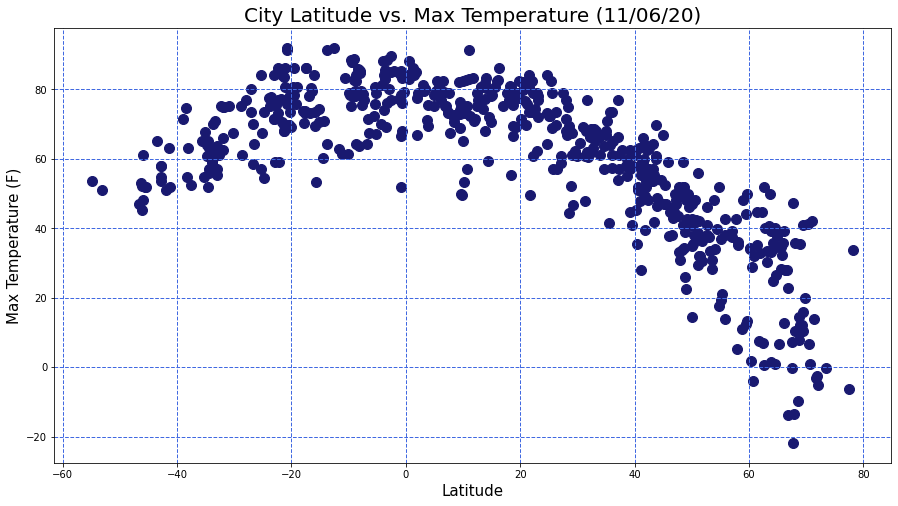

In [9]:
plt.figure(figsize=(15,8))
todayDate = arrow.now().format('MM/DD/YY')
plt.scatter(city_weather_df['Latitude'], city_weather_df['Max Temp'], s=100, c='midnightblue')
plt.title(f'City Latitude vs. Max Temperature ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Max Temperature (F)',fontsize =15)
plt.grid(color='royalblue', linestyle='--', linewidth=1)
plt.savefig('Final_Outputs/Latitude_Temperature.png')


### Latitude vs. Humidity Plot

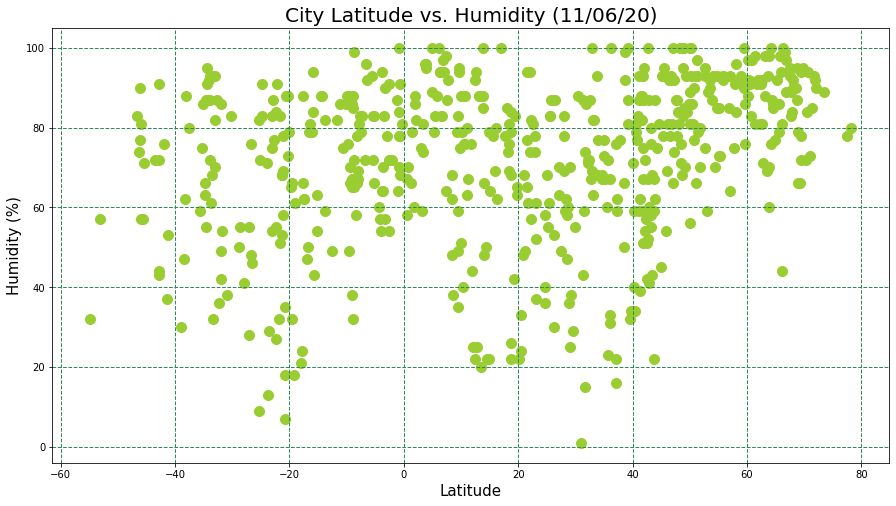

In [10]:
plt.figure(figsize=(15,8))
plt.scatter(city_weather_df['Latitude'], city_weather_df['Humidity'], s=100, c='yellowgreen')
plt.title(f'City Latitude vs. Humidity ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Humidity (%)',fontsize =15)
plt.grid(color='seagreen', linestyle='--', linewidth=1)
plt.savefig('Final_Outputs/Latitude_Humidity.png')

### Latitude vs. Cloudiness Plot

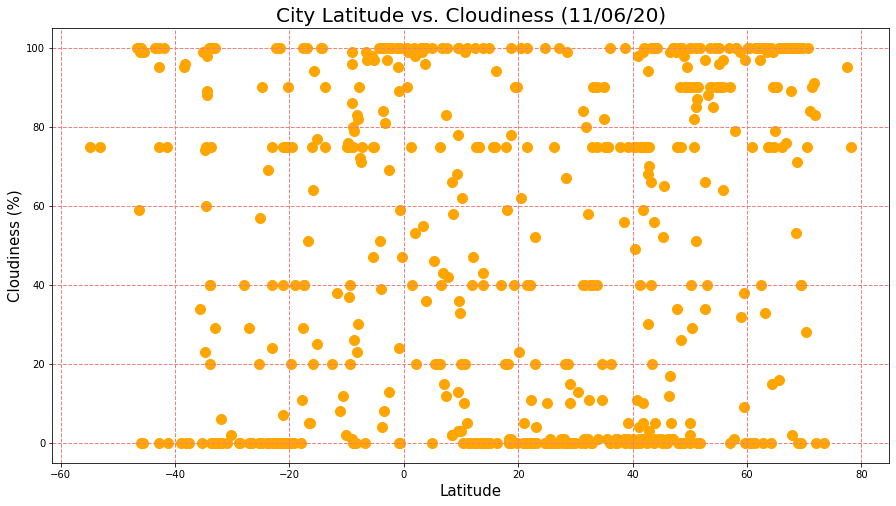

In [11]:
plt.figure(figsize=(15,8))
plt.scatter(city_weather_df['Latitude'], city_weather_df['Cloudiness'], s=100, c='orange')
plt.title(f'City Latitude vs. Cloudiness ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Cloudiness (%)',fontsize =15)
plt.grid(color='lightcoral', linestyle='--', linewidth=1)
plt.savefig('Final_Outputs/Latitude_Cloudiness.png')

### Latitude vs. Wind Speed Plot

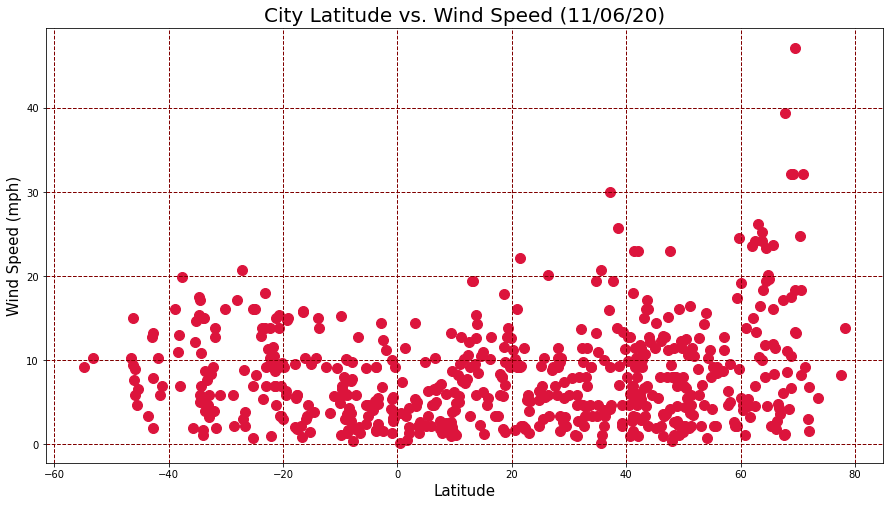

In [12]:
plt.figure(figsize=(15,8))
plt.scatter(city_weather_df['Latitude'], city_weather_df['Wind Speed'], s=100, c='crimson')
plt.title(f'City Latitude vs. Wind Speed ({todayDate})',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Wind Speed (mph)',fontsize =15)
plt.grid(color='maroon', linestyle='--', linewidth=1)
plt.savefig('Final_Outputs/Latitude_WindSpeed.png')

## Linear Regression

###  Northern Hemisphere - Correlation Coefficient for Max Temp vs. Latitude

In [13]:
# get the latitudes for northern hemisphere and southern hemisphere
northern_hemisphere_df = city_weather_df.loc[city_weather_df['Latitude'] >= 0,:]
southern_hemisphere_df = city_weather_df.loc[city_weather_df['Latitude'] < 0,:]

# Calculate the correlation coefficient to see the cooralation between max temperature and latitude in the northern hemisphere
correlation_coefficient = round(sts.pearsonr(northern_hemisphere_df['Latitude'], northern_hemisphere_df['Max Temp'])[0],4)

print(f'The correlation coefficient for max temperature and latitude in the northern hemisphere is: {correlation_coefficient}\n')

The correlation coefficient for max temperature and latitude in the northern hemisphere is: -0.8601



###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

the r value is: -0.8601177553339459



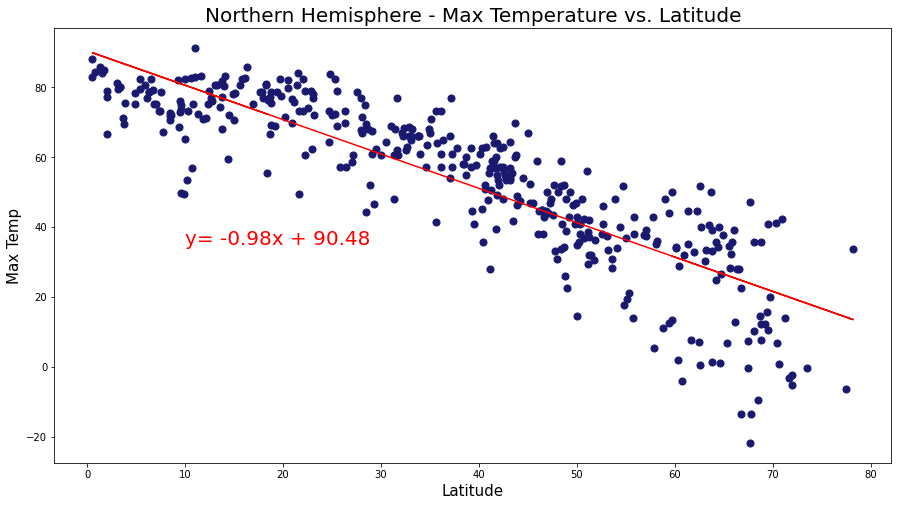

In [23]:
# Calculate the linear regression for max temperature and latitude in the northern hemisphere

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(northern_hemisphere_df['Latitude'], northern_hemisphere_df['Max Temp'])
regress_values = slope * northern_hemisphere_df['Latitude'] + intercept
equation = 'y= ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

plt.figure(figsize=(15,8))
plt.scatter(northern_hemisphere_df['Latitude'], northern_hemisphere_df['Max Temp'], s=50, c='midnightblue')
plt.plot(northern_hemisphere_df['Latitude'], regress_values, color='red')
plt.title('Northern Hemisphere - Max Temperature vs. Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Max Temp',fontsize =15)
plt.annotate(equation, xy=(10, 35), fontsize=20, color='red')
print(f'the r value is: {rvalue}\n')
plt.savefig('Final_Outputs/Temperature_Latitude_NorthHem.png')

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [15]:
# Calculate the correlation coefficient to see the cooralation between max temperature and latitude in the southern hemisphere
correlation_coefficient = round(sts.pearsonr(southern_hemisphere_df['Latitude'], southern_hemisphere_df['Max Temp'])[0],4)

print(f'The correlation coefficient for max temperature and latitude in the southern hemisphere is: {correlation_coefficient}\n')

The correlation coefficient for max temperature and latitude in the southern hemisphere is: 0.661



the r value is: 0.6610109894542817



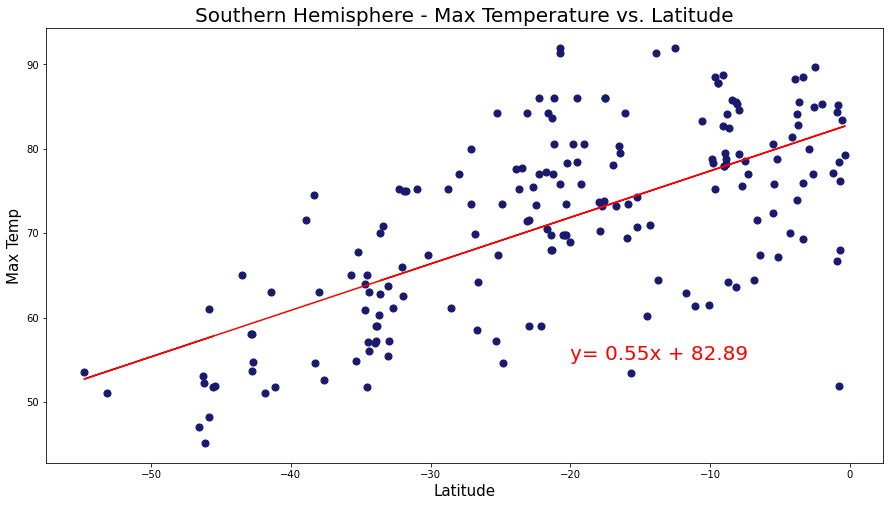

In [16]:
# Calculate the linear regression for max temperature and latitude in the southern hemisphere

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(southern_hemisphere_df['Latitude'], southern_hemisphere_df['Max Temp'])
regress_values = slope * southern_hemisphere_df['Latitude'] + intercept
equation = 'y= ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))

plt.figure(figsize=(15,8))
plt.scatter(southern_hemisphere_df['Latitude'], southern_hemisphere_df['Max Temp'], s=50, c='midnightblue')
plt.plot(southern_hemisphere_df['Latitude'], regress_values, color='red')
plt.title('Southern Hemisphere - Max Temperature vs. Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =15)
plt.ylabel('Max Temp',fontsize =15)
plt.annotate(equation, xy=(-20, 55), fontsize=20, color='red')
print(f'the r value is: {rvalue}\n')
plt.savefig('Final_Outputs/Temperature_Latitude_SouthHem.png')